In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

 При выполнении задания используется распределение Фишера ([Вики](https://en.wikipedia.org/wiki/F-distribution), [SciPy Reference](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.f.html#scipy.stats.f)). Случайная величина описывается двумя параметрами, _$d_1$_ и _$d_2$_, и представляет собой отношение двух независимых случайных величин, распределенных как $\chi^2_{d_1}$ и $\chi^2_{d_2}$

# Шаг 1. Задание распределения и построение выборки по нему

In [2]:
df1, df2 = 6, 13 #задаем степени свободы распределения
f_rv=stats.f(df1, df2)

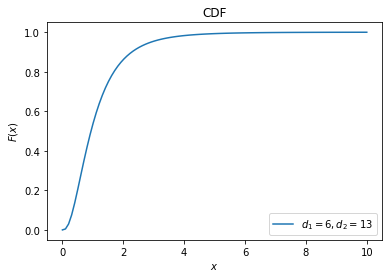

In [3]:
#рисуем график функции расперделения (на всякий случай)
x=np.linspace(0,10,100)
cdf=f_rv.cdf(x)
plt.plot(x,cdf, label="$d_1=%i, d_2=%i$" % (df1,df2))
plt.title("CDF")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.legend()

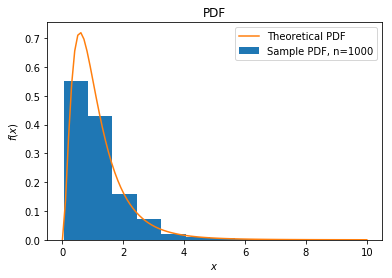

In [7]:
#генерируем выборку, рисуем график плотности и гистограмму по выборке
x=np.linspace(0,10,100)
pdf=f_rv.pdf(x)
n=1000 # объем выборки
sample=f_rv.rvs(n)
plt.hist(sample, normed=True, label="Sample PDF, n=%i" % n)
plt.plot(x,pdf, label="Theoretical PDF")
plt.legend()
plt.title("PDF")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")

# Шаг 2. Центральная Предельная Теорема

Весь анализ, требуемый в задании, будет выполнен в функции 'analyse_clt'. Поскольку задание требует выполнения анализа для нескольких значений _n_ (объема выборки), в таком виде менять параметры значительно проще.

In [5]:
def analyse_clt(rv, sample_size, number_of_samples):
    print "CLT Analysis for n=%i, Number of Iterations=%i" % (sample_size, number_of_samples)
    
    #теоретические значения среднего и дисперсии исходного распределения
    true_mean, true_var=rv.stats(moments='mv')

    #теоретические значения среднего и дисперии *средних значений* в выборке
    clt_mean=true_mean
    clt_var=true_var/sample_size

    print "True Mean=%.4f, True Variance=%.4f" % (true_mean, true_var)
    print "CLT Mean=%.4f, CLT Variance=%.4f" % (clt_mean, clt_var)
    
    #создаем массив выборочных средних
    means_sample=[rv.rvs(sample_size).mean() for x in range(number_of_samples)]

    #задаем функцию плотности вероятности для приближения по ЦПТ
    x=np.linspace(0,5,100) #hardcoded norm-dist size
    pdf=stats.norm(loc=clt_mean, scale=clt_var**0.5).pdf(x)

    #рисуем гистограмму выборки и теоретическую плотность
    plt.hist(means_sample, normed=True, label="Sample PDF, $N=%i$" % number_of_samples)
    plt.plot(x,pdf, label="CLT Approximation")
    plt.legend()
    plt.title("PDF of Sample Mean, $n=%i$" % sample_size)
    plt.ylabel("$f(x)$")
    plt.xlabel("$x$")
    plt.show()

CLT Analysis for n=5, Number of Iterations=1000
True Mean=1.1818, True Variance=0.8794
CLT Mean=1.1818, CLT Variance=0.1759


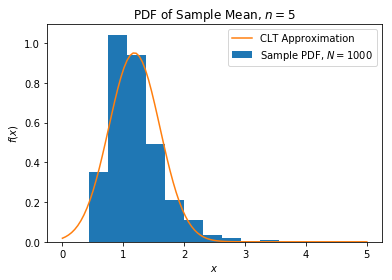

CLT Analysis for n=10, Number of Iterations=1000
True Mean=1.1818, True Variance=0.8794
CLT Mean=1.1818, CLT Variance=0.0879


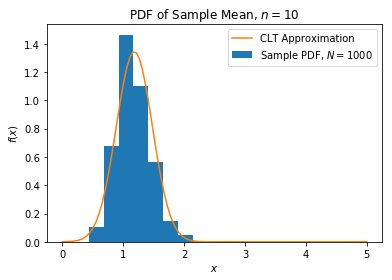

CLT Analysis for n=50, Number of Iterations=1000
True Mean=1.1818, True Variance=0.8794
CLT Mean=1.1818, CLT Variance=0.0176


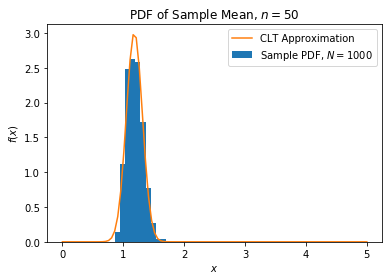

In [6]:
#выполняем анализ для нужных значений n (размеров выборок)
for n in [5,10,50]:
    analyse_clt(f_rv, n, 1000)

# Шаг 3. Выводы
Из графиков выше видно, насколько более точным становится приближение среднего значения по мере увеличения размера выборки. Если при маленьких значениях (например _n=5_) гистограмма полученных средних сильно отличается от теоретическго приближения по ЦПТ (не очень симметрична и имеет большой разброс), то при больших значениях (например _n=50_) теоретическая плотность по ЦПТ гораздо точнее приближает реальные выборки.